In [1]:
!pip install watermark keras-vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.10.0
    Uninstalling typing_extensions-4.10.0:
      Successfully uninstalled typing_extensions-4.10.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:


# Arquitetura LeNET-5 (LeCun, 1998)

Podemos usar a arquitetura LeNet-5 principalmente para a classificação de imagens gráficas. Este tipo de rede é semelhante à rede feedforward: fluxo de dados de entrada para a saída. No entanto, a rede LeNet-5 contém vários tipos de camadas diferentes como mostra a figura abaixo.

![lenet5](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

As seguintes camadas são encontradas na LeNET-5:

- **Dense Layer**: Camadas totalmente conectadas
- **Convolutional Layer**: Usadas para "escanear" as imagens
- **Max-Pooling Layer**: Usadas para redução da imagem
- **Dropout Layer**: Usadas para regularização da rede



# Bibliotecas

In [1]:
from keras.datasets import mnist
# from keras.utils import np_utils
from tensorflow.keras import utils
# utils.to_categorical
from keras.models import load_model


# Dataset - MNIST

O conjunto de dados MNIST é um dataset amplamente utilizado em tarefas de aprendizado de máquina e visão computacional. Ele consiste em um conjunto de imagens em preto e branco de dígitos escritos à mão, variando de 0 a 9. O nome MNIST é uma abreviação de "Modified National Institute of Standards and Technology", uma referência à origem dos dados.

O dataset MNIST é composto por um total de 70.000 imagens. Essas imagens são divididas em um conjunto de treinamento, que contém 60.000 exemplos, e um conjunto de teste, com 10.000 exemplos. As imagens possuem dimensões de 28 por 28 pixels.

Cada imagem no dataset MNIST é representada como uma matriz de números, em que cada número representa a intensidade do pixel. Os valores variam de 0 a 255, indicando o nível de cinza do pixel, em que 0 representa o branco e 255 representa o preto. Essa representação permite que as imagens sejam facilmente processadas por algoritmos de aprendizado de máquina.

![MNIST](https://www.mdpi.com/applsci/applsci-09-03169/article_deploy/html/images/applsci-09-03169-g001-550.jpg)

O objetivo principal do dataset MNIST é fornecer um conjunto de dados padronizado para aprimorar e comparar algoritmos de reconhecimento de dígitos escritos à mão. É comumente usado como uma introdução ao campo de aprendizado de máquina, permitindo que os pesquisadores e desenvolvedores desenvolvam e testem algoritmos de classificação.

Em resumo, o dataset MNIST é uma coleção de imagens de dígitos escritos à mão usada para treinar e avaliar algoritmos de reconhecimento de dígitos. Ao colocá-lo em um notebook, você pode explorar, visualizar e treinar modelos de aprendizado de máquina para realizar essa tarefa.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalização dos dados

A normalização de imagens dividindo por 255 é um procedimento comum em redes neurais convolucionais (CNNs) aplicadas ao processamento de imagens. Essa prática é realizada para garantir que os dados de entrada estejam dentro de uma faixa de valores adequada e padronizada.

Quando tratamos de imagens digitais, os pixels são representados por valores inteiros que variam de 0 a 255 em uma escala de cinza, onde 0 representa o preto e 255 o branco. Nas imagens coloridas, geralmente são usadas três camadas de cores (vermelho, verde e azul) e cada camada também pode ter intensidades entre 0 e 255.

A normalização divide cada valor de pixel pelo valor máximo possível (255) para reescalar os dados no intervalo de 0 a 1. Isso é feito para facilitar o processo de treinamento da CNN e melhorar a convergência do algoritmo de otimização. Existem várias razões pelas quais essa normalização é benéfica:

1. Redução da variabilidade: A normalização dos valores dos pixels ajuda a reduzir a variabilidade dos dados, permitindo que a CNN aprenda mais rapidamente e de forma mais eficaz. Isso ocorre porque as variações na intensidade dos pixels podem não ser relevantes para a tarefa em questão, e a normalização os coloca em uma escala mais adequada para o aprendizado.

2. Equilíbrio dos gradientes: Durante o treinamento de uma CNN, os gradientes são usados para atualizar os pesos da rede. Valores de pixel maiores, como 255, podem gerar gradientes muito altos que podem dificultar a convergência ou causar problemas de instabilidade numérica. Dividindo os pixels por 255, o intervalo dos gradientes é reduzido, ajudando a equilibrar o processo de otimização.

3. Compatibilidade com funções de ativação: Algumas funções de ativação, como a função sigmoide ou tangente hiperbólica, são mais sensíveis a grandes valores de entrada. A normalização ajuda a evitar a saturação dessas funções e garante que os dados estejam na faixa em que as funções se comportam melhor.

4. Normalização consistente: A normalização dos pixels por 255 é um processo simples e amplamente adotado, o que facilita a comparação e reprodução de resultados entre diferentes modelos e conjuntos de dados. Essa padronização permite que pesquisadores e desenvolvedores compartilhem facilmente suas arquiteturas de CNN e os resultados obtidos.

Portanto, ao normalizar as imagens dividindo por 255, você está preparando seus dados de entrada para uma melhor convergência durante o treinamento da CNN, reduzindo a variabilidade e equilibrando os gradientes. Essa prática ajuda a melhorar o desempenho geral do modelo e permite uma comparação mais consistente entre diferentes implementações.

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# Target Categorical

In [4]:
# utils.to_categorical

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

# Modelo LeNet-5

In [6]:
from keras.models import Sequential
from keras import models, layers
import keras
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding="same"))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))
#Flatten the CNN output
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=["accuracy"])

In [7]:
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 [==============================] - 91s 189ms/step - loss: 0.2805 - accuracy: 0.9191 - val_loss: 0.1821 - val_accuracy: 0.9473
Epoch 2/10
469/469 [==============================] - 79s 169ms/step - loss: 0.1593 - accuracy: 0.9531 - val_loss: 0.1380 - val_accuracy: 0.9582
Epoch 3/10
469/469 [==============================] - 78s 165ms/step - loss: 0.1156 - accuracy: 0.9653 - val_loss: 0.1005 - val_accuracy: 0.9704
Epoch 4/10
469/469 [==============================] - 78s 166ms/step - loss: 0.0897 - accuracy: 0.9730 - val_loss: 0.0791 - val_accuracy: 0.9753
Epoch 5/10
469/469 [==============================] - 77s 164ms/step - loss: 0.0741 - accuracy: 0.9771 - val_loss: 0.0628 - val_accuracy: 0.9813
Epoch 6/10
469/469 [==============================] - 78s 166ms/step - loss: 0.0665 - accuracy: 0.9794 - val_loss: 0.0660 - val_accuracy: 0.9800
Epoch 7/10
469/469 [==============================] - 77s 164ms/step - loss: 0.0628 - accuracy: 0.9807 - val_loss: 0.0592 - val_ac

In [8]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 4s 14ms/step - loss: 0.0528 - accuracy: 0.9832
Test loss 0.0528, accuracy 98.32%


Text(0, 0.5, 'Acc')

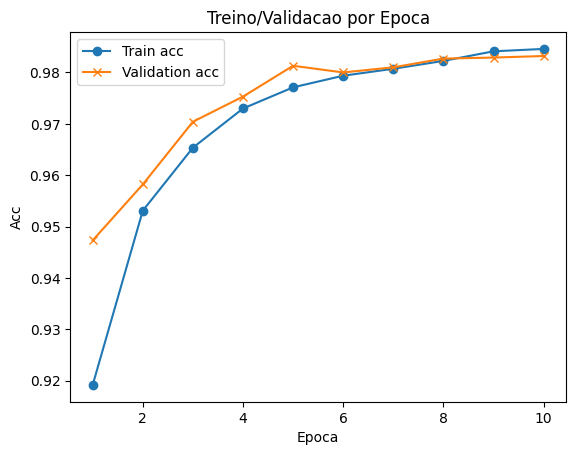

In [9]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Treino/Validacao por Epoca')
ax.set_xlabel('Epoca')
ax.set_ylabel('Acc')

Text(0, 0.5, 'Loss')

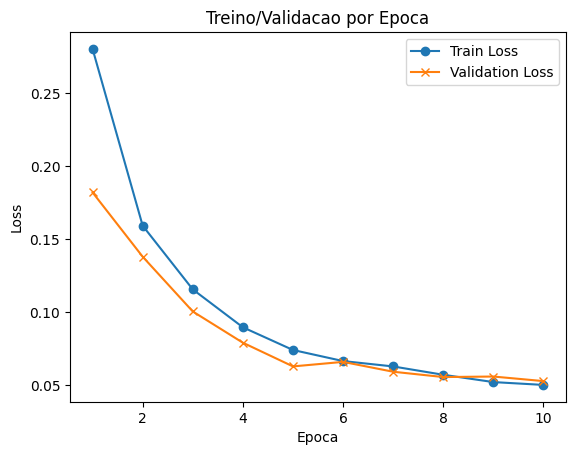

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Treino/Validacao por Epoca')
ax.set_xlabel('Epoca')
ax.set_ylabel('Loss')